<a href="https://colab.research.google.com/github/CNielsen94/Random_data_repo/blob/main/notebooks/Wiki_RAG_GPT_DBS_Acronym.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Let's refresh our memories with some questions:
1. What does GPT stand for, and what are the possible benefits of utilizing these?
2. What is RAG? Why is it relevant in terms of GPTs?
3. Can you give some example use cases (silly or serious) of RAG?
4. What are some of the differences between prompt engineering and fine-tuning?
5. Why is one sometimes preferred over the other?

##My ideas about it:

**What does GPT stand for, and what are the possible benefits of utilizing these?**

GPT stands for "Generative Pre-trained Transformer." It is a type of artificial intelligence model designed for understanding and generating human-like text. The benefits of utilizing GPT models include: <br>
- Natural Language Understanding: GPT models can comprehend complex language nuances, making them useful for a variety of NLP tasks.
- Content Generation: They can generate coherent and contextually relevant text, aiding in applications like content creation, chatbots, and more.
- Scalability: GPT models can handle different scales of language tasks, from simple text generation to complex question answering.
- Customization: While GPT models are pre-trained, they can be fine-tuned for specific industries or applications, making them versatile tools.

**What is RAG? Why is it relevant in terms of GPTs?**

RAG stands for "Retrieval-Augmented Generation." It is a framework that combines the powers of language models like GPT with information retrieval systems. RAG is relevant in terms of GPTs because:
- Enhanced Information: It enables GPT models to access a broader range of information beyond what they were trained on, by retrieving external documents or data and incorporating that information into the generation process.
- Improved Accuracy: By using retrieved information, RAG-enhanced GPT models can provide more accurate and contextually relevant answers.
- Versatility in Applications: This approach is particularly useful in applications where the answer depends on the most recent or specific information, such as question-answering systems.

**Example use cases of RAG (silly or serious):**

- Serious: Creating a medical chatbot that retrieves the latest research articles to provide up-to-date health advice.
- Silly: Designing a story generator that pulls in random facts from the internet to create bizarre and humorous tales.
- Mixed: Developing a cooking assistant that suggests recipes based on the random ingredients it finds from various online sources.

**Differences between prompt engineering and fine-tuning:**

- Prompt Engineering: This involves crafting the input text (prompt) to a language model in such a way that it elicits the desired response. It doesn't require changing the model itself but understanding how to effectively communicate with it.
- Fine-Tuning: This process involves continuing the training of a pre-trained model on a new dataset specific to a particular task or domain. It customizes the model’s parameters to better perform on tasks that differ from the original training data.
- Key Differences: Prompt engineering is about finding the right questions, while fine-tuning is about teaching the model new answers.

**Why is one sometimes preferred over the other?**

- **Prompt Engineering is often preferred when:**
1. Access to the model's internals is restricted.
2. There is a need for quick, cost-effective solutions without the computational resources for retraining.
3. The task can be accomplished by creatively formulating prompts.
- **Fine-Tuning is preferred when:**
1. There is a specific, recurring task that the base model does not perform well on.
2. There is enough labeled data to retrain the model effectively.
3. The goal is to significantly improve performance on a narrow task or specific domain.

##**Some ways of thinking about using RAG and GPT in a project**

**GPT Models (Generative Pre-trained Transformer):** <br>
GPT models are a type of language model that use deep learning techniques to produce human-like text. They can be used for a variety of applications such as text generation, translation, summarization, and question-answering. In the context of business data science, GPT models can be leveraged for:

**Natural Language Processing (NLP) tasks:**
Analyzing customer feedback, generating product descriptions, or creating chatbots. <br>
**Data Analysis and Interpretation:** Summarizing reports, generating insights from data, or explaining complex datasets in natural language. <br>
**Predictive Analytics:** Forecasting market trends, consumer behavior, or financial indicators based on historical data. <br>

**RAG (Retrieval-Augmented Generation):** <br>
RAG is a hybrid model that combines a retrieval-based approach with a generative model like GPT. It first retrieves relevant documents or data snippets based on the input query and then uses this information to generate a response. RAG is particularly useful for applications where the response requires external knowledge not contained within the model itself. <br>
Some examples of what RAG can be used for:

**Enhanced Question Answering:** Providing detailed answers to business-related questions by retrieving and synthesizing information from various sources.<br>
**Content Creation and Summarization:** Generating reports, summaries, or articles that incorporate data and information from multiple business documents.<br>
**Decision Support:** Offering recommendations or insights by retrieving and processing relevant business data and trends.<br>

**Integrating GPT and RAG into Your Project:**<br>
To utilize GPT models and RAG in your project, consider the following steps:

**Define the Problem:** Clearly define what business problem you are solving. Is it customer service automation, market analysis, content generation, or something else?

**Data Collection and Processing:** Gather and preprocess the relevant business data. For RAG, you will also need a dataset or a corpus from which the model can retrieve information.

**Model Selection and Training:** Choose the appropriate GPT and RAG models for your task. You may use pre-trained models from libraries like Hugging Face's Transformers and fine-tune them on your specific business data.

**Integration and Deployment:** Integrate the models into your data processing pipeline. Ensure that the RAG model can access and retrieve from your business data corpus effectively.

**Evaluation and Iteration:** Test the system's performance on real-world business queries and tasks. Collect feedback and iteratively improve the model's accuracy and relevance.

#Aight, enough with wordy nerdy stuff, let's code!

## Logical flowmap
**So let's go over the logical flow of this app. I know it seems super simple from this flowchart, but we gotta start somewhere ya know**

![](https://raw.githubusercontent.com/CNielsen94/Random_data_repo/main/media/SuperSimple.png)

**I bet that scared ya for a second ;)** <br>
Not saying that I'm an artist, but look at the actual masterpiece I created:

![](https://raw.githubusercontent.com/CNielsen94/Random_data_repo/main/media/ImNotAnArtist.png)

##Pesky installs

In [1]:
!pip install pinecone-client sentence-transformers requests

In [2]:
import pinecone
import requests
from sentence_transformers import SentenceTransformer

In [3]:
!pip install transformers
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer

## Setting up vector storage (pinecone index)

I had to read up on this myself, since it's been I don't know how long since I used it myself, but when you set up Pinecone indexes now, you gotta choose between a Podspec and Serverless index. In the case of Pinecone, the latter is a paid service, so we'll run with Podbased. If you're interested however, you can glance the main differences here: <br><br>
**PodSpec (Pod-Based Deployment):**

**Resource Allocation:** In a pod-based deployment like the one indicated by PodSpec, resources are allocated as containers or pods. This can provide more dedicated resources compared to serverless, leading to potentially better and more predictable performance.<br>
**Cost:** While offering more control and potentially better performance, pod-based deployments typically have a fixed cost based on the allocated resources, regardless of usage. This means you pay for the resources even when they are idle.<br>
**Scalability:** Pod-based deployments can be scaled, but this typically requires manual adjustment or setup of auto-scaling parameters. The scaling process is not as instantaneous as with serverless.<br>
**Use Cases:** Ideal for applications with predictable workload patterns or when consistent performance is critical. <br><br>
**Serverless (Serverless Deployment):**

**Resource Allocation:** In a serverless deployment, the underlying infrastructure is abstracted away, and resources are dynamically allocated based on demand. This means your application can scale automatically without needing to manage servers or containers.<br>
**Cost:** With serverless, you typically pay only for the compute time you use, which can be more cost-effective for sporadic, unpredictable workloads or applications with varying levels of traffic.<br>
**Scalability:** Serverless services can automatically scale from zero to handling potentially thousands of requests per second without manual intervention. <br>
**Use Cases:** Ideal for applications with variable traffic, microservices, and for developers who want to focus on code rather than managing infrastructure.

In [25]:
from pinecone import Pinecone, PodSpec

# Pinecone setup
# Load Pinecone API key from a file
with open("pinecone_key.txt", "r") as file:
    pinecone_api_key = file.read().strip()

# We instantiate a pinecone object using our API-key, and save it to the variable pc. This variable is where all the index magic happens!
pc = Pinecone(api_key=pinecone_api_key) # We instantiate a pinecone object using our API-key, and save it to the variable pc. This variable is where all the index magic happens!
index_name = 'wikipedia' #provide a name for our index

Quick note on Pinecone: <br>
If you don't run some sort of check as to whether or not your pinecone index already exists, and you've already instantiated it, it will cause an error saying that an index of that name already exists. <br>
This is why I've set this little if-statement up, just so that I can avoid that runtime error. In your projects, you can simply create the index either manually on the website, or through code which you then comment out to avoid runtime errors (or check the existing indexes like this).

In [5]:
# Initialize or connect to the Pinecone index
if index_name not in pc.list_indexes().names():
    pc.create_index(
        name=index_name,
        dimension=384,  # Matching the Sentence Transformer model output embedding vector dimensionality
        metric="cosine", # This is our metric for measuring similarities
        spec=PodSpec(environment="gcp-starter")
    )
index = pc.Index(index_name)

READ THE DOCUMENTATION FOR PETES SAKE! - https://docs.pinecone.io/docs/upsert-data

## Let's set up a data retrieval pipeline!

In order to put our data into our pinecone index, we need to turn them into vectorized embeddings. We do this using a sentence transformer.

In [6]:
# Initialize Sentence Transformer Model
sentence_transformer = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


First we set up a a function to ping the Wiki API. In this case I am pulling the content of the specific content page, as well as the last time it had a revision. I do this so that I can keep my index updated by comparing the metadata. <br>
Ideally you would probably want this to be a separate workflow (self-updating DB), but I'm gonna do this just to show you how to set up a pinecone index and populate it

In [7]:
def fetch_relevant_wikipedia_content(search_term):
    # First, search for related article titles based on the search term
    search_url = "https://en.wikipedia.org/w/api.php"
    search_params = {
        "action": "query",
        "list": "search",
        "srsearch": search_term,
        "format": "json",
        "srlimit": 5  # Adjust based on your needs
    }
    search_response = requests.get(search_url, params=search_params).json()
    search_results = search_response.get('query', {}).get('search', [])
    titles = [result['title'] for result in search_results]

    # Now, fetch the content for each of the found titles
    content_data = []
    for title in titles:
        fetch_params = {
            "action": "query",
            "format": "json",
            "titles": title,
            "prop": "extracts|info",
            "exintro": True,
            "explaintext": True,
            "inprop": "url"
        }
        fetch_response = requests.get(search_url, params=fetch_params).json()
        page = next(iter(fetch_response['query']['pages'].values()))
        if 'extract' in page:
            content_data.append((page['title'], page['extract'], page.get('lastrevid', 0)))
        else:
            content_data.append((title, 'Content not found.', 0))

    return content_data

Now that we can fetch our data, we could technically implement RAG right away by just having the model constantly asking Wikipedia for information to augment the text generation. <br>
However, since part of your assignment is to utilize vector databases/indexes, I've decided to completely over-engineer this thing. I've done my best to comment out the individual code pieces, so that you can read through and (hopefully) understand each part.<br>

**"Pro" tip:** Note that I've commented out a bunch of print() statements inside the function. You can utilize print() statements inside functions to make sure your inputs/outputs and variables are formatted correctly. Since Python (including any defined function) runs line by line, these statements will work regardless of the rest of the function failing. When you're done debugging either delete or comment them out.

In [8]:
def add_or_update_page_in_pinecone(article_data):
    """Add or update a Wikipedia page in the Pinecone vector database."""
    # Unpack the tuple into variables
    title, content, revision_id = article_data

    # Format title for Pinecone
    formatted_title = title.replace(' ', '_')

    # Check if content is valid
    if not content or content == 'Page not found.':
        print(f"No valid content for '{title}'. Skipping update in Pinecone.")
        return

    # Generate content embedding
    content_embedding = sentence_transformer.encode([content])[0].astype('float32').tolist()

    # Prepare the data for querying Pinecone to check if an update is needed
    query_results = index.query(vector=content_embedding, top_k=1)
    if query_results["matches"]:
        existing_title = query_results["matches"][0]["id"]
        if existing_title == formatted_title:
            fetch_response = index.fetch(ids=[formatted_title])
            existing_record = fetch_response['vectors'].get(formatted_title, {})
            existing_metadata = existing_record.get('metadata', {})

            if existing_metadata.get('revision_id', 0) >= revision_id:
                print(f"No update needed for '{title}'.")
                return

    # Upsert the new or updated content and metadata into Pinecone
    try:
        index.upsert(vectors=[(formatted_title, content_embedding, {"revision_id": revision_id, "content_summary": content[:100]})])
        print(f"Page '{title}' (formatted as '{formatted_title}') added or updated in Pinecone.")
    except Exception as e:
        print(f"An error occurred while upserting '{title}' (formatted as '{formatted_title}'): {e}")


# Setting up the API
(Since I've hit the GPU backend limits on Google, I've had to continue the notebook using the same API as the other example, but I've left in the local model code equivelant to give you an idea of how to do it. The workflow doesn't differ much.

But this is dirt cheap as well. During the entire development of this notebook (which took way too long, but was great fun), I've spent about 0.04 out the 10.00$ i had left.

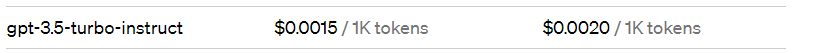

In [9]:
!pip install openai

In [10]:
import openai
import os

In [11]:
with open("openai_key.txt", "r") as file:
    openai.api_key = file.read().strip()

# Set up the actual AG of RAG:

##Set up for local model (for inspiration)

In [ ]:
def is_relevant(query_results, threshold=0.5):
    """Check if the top retrieved documents are relevant based on a threshold.
    query_results: Explanation
    threshold: This is used to determine relevancy of stored texts in relation to the query
    """
    # Assume relevance based on the highest score among the top results
    if not query_results["matches"]:
        return False
    return query_results["matches"][0]["score"] >= threshold

This function does the same as the stuff for the API, it's just put together into one massive clump of code. This is one of my bad habits, and do not do this for your own sanity. It might sound cool to build a massive function that does it all, but it's more efficient to build a lot of functions that do the same, and then put them together afterwards if need be.

In [ ]:
def generate_response_with_retrieved_documents(query, top_k=5):
    # Generate query embedding and convert it from ndarray to list
    query_embedding = sentence_transformer.encode([query])[0].astype('float32').tolist()

    # Retrieve top K similar documents from Pinecone using keyword arguments
    query_results = index.query(vector=query_embedding, top_k=top_k)
    if not is_relevant(query_results, threshold=0.5):
        # Clear and directive GPT prompt
        suggestion_prompt = f"Considering the topic '{query}', create a python-format list related Wikipedia article titles separated by commas. Focus strictly on generating relevant titles without additional explanations."
        suggested_titles = llm(suggestion_prompt)
        print(suggested_titles)
        # Extract and process potential titles from the GPT output
        potential_titles = [title.strip() for title in suggested_titles[0]['generated_text'].split(',') if title.strip() and " " in title and not title.lower().startswith('considering the topic')]

        # Update the database with these potential titles
        for title in potential_titles:
            if title and title.isprintable() and len(title.split()) > 1:  # Basic checks for valid titles
                # Additional checks to filter out phrases from the prompt
                if not any(phrase in title.lower() for phrase in ['list only the titles', 'related to the topic']):
                    add_or_update_page_in_pinecone(title)

        # Re-query Pinecone after updating using keyword arguments
        query_results = index.query(vector=query_embedding, top_k=top_k)

    # Fetch the contents of the matched documents
    matched_titles = [match["id"] for match in query_results["matches"]]
    documents = []
    for title in matched_titles:
        fetch_response = index.fetch(ids=[title])  # Correct method to fetch data
        if title in fetch_response['vectors']:
            documents.append(fetch_response['vectors'][title].get('metadata', {}).get('content', ''))

    # Combine the documents into a single text
    combined_documents = " ".join(documents)

    # Use GPT to generate a response based on the combined documents
    input_for_gpt = f"Based on the provided documents, answer the question: '{query}'. {combined_documents}"
    generated_texts = llm(input_for_gpt)
    return generated_texts[0]['generated_text']

##Setup for API instead (because Google restrictions suck):

This function, **retrieve_similar_documents()**, is designed to find documents that are similar to a given query within a vector database (like Pinecone).

It takes the users question, turns it into embeddings using the sentence_transformer and uses that embedding vector to query the vector databases for the top 5 matching documents based on cosine similarity (which we set as our search criteria when we created the index).

In [12]:
def retrieve_similar_documents(query, top_k=5):
    query_embedding = sentence_transformer.encode([query])[0].astype('float32').tolist()
    #print(f"Query Embedding: {query_embedding}")  # Debug: Check the query embedding

    query_results = index.query(vector=query_embedding, top_k=top_k)
    #print(f"Query Results: {query_results}")  # Debug: Check the returned results

    return query_results

This function, check_relevance, is designed to evaluate whether the most relevant document retrieved by the retrieve_similar_documents function is indeed relevant based on a predefined threshold (basically a nice little double-check):

It checks if there are any matches returned by the query. If there are no matches, it prints "No matches found." and returns False, indicating no relevant documents were found.

If there are matches, the function retrieves the highest similarity score from the returned results, which is the score of the most similar document to the query.

Finally, it evaluates whether the top match's score exceeds the specified threshold (default is 0.5). If the score is higher than the threshold, it implies the document is relevant to the query and returns True. Otherwise, it returns False. This helps in deciding whether to proceed with using the retrieved documents for further processing or response generation.

In [13]:
def check_relevance(query_results, threshold=0.5):
    if not query_results["matches"]:
        print("No matches found.")  # Debug: No matches
        return False
    top_score = query_results["matches"][0]["score"]
    #print(f"Top match score: {top_score}, Threshold: {threshold}")  # Debug: Compare top score and threshold
    return top_score >= threshold

I know this is a bit of a mouthful, but here goes:<br><br>
This function, **generate_and_format_titles()**, automates the process of generating a list of Wikipedia article titles related to a given query using an OpenAI model:

**Setting Up Prompt:** It constructs a prompt instructing the language model to generate a list of Wikipedia article titles related to the given query. The instruction specifies the format expected: a Python list of strings without leading hyphens, numbers, or unnecessary characters.

**Requesting OpenAI API:** The function then sends this prompt to the specified OpenAI model (default gpt-3.5-turbo-instruct) to generate a response. Parameters like max_tokens, temperature, top_p, frequency_penalty, and presence_penalty are set to guide the response generation.

**Processing the Response:** The function strips any leading or trailing whitespace from the response text and attempts to evaluate it directly into a Python list using eval(). This is a critical step but comes with a warning: using eval() can be risky as it will execute the string as Python code, which can be dangerous if the string contains malicious code.

**Validation and Return:** It checks whether the evaluated output is indeed a list. If so, it returns this list of titles. If not, it raises a ValueError indicating that the output is not in the expected format. In the case of a syntax error during evaluation (which could happen if the model's output isn't a valid Python expression), it prints an error message and returns an empty list.

**Handling Risks:** The comments highlight the inherent risk of using eval() and suggest that if direct evaluation is considered too dangerous or if the output format is too varied and unpredictable, an alternative approach should be considered, such as manually parsing the string into a list.

This function is pivotal in translating natural language queries into specific, structured requests for information that can be further processed or queried against a database or API, like fetching detailed content from Wikipedia for those titles.

In [14]:
def generate_and_format_titles(query, model='gpt-3.5-turbo-instruct'):
    suggestion_prompt = f"""
    Given the topic '{query}', generate a list of related Wikipedia article titles in Python list format, with each title as a string. Ensure the titles are relevant and formatted correctly within the list without leading hyphens, numbers, or unnecessary characters. For example: ['Title1', 'Title2', 'Title3'].
    """

    suggested_titles_response = openai.completions.create(
        model=model,
        prompt=suggestion_prompt,
        max_tokens=1024,
        temperature=0.0,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )
    #print(f'RESPONSE BEFORE FORMATTING: {suggested_titles_response.choices[0].text}') #Debugging print()

    # Extracting the text from the response
    suggested_titles_text = suggested_titles_response.choices[0].text.strip()

    # Directly evaluating the string to convert to Python list

    # Because the output can vary a bit (these models have creative temperament).
    # I've found a way to adress format issues. eval() takes strings and executes it as code
    # THIS IS PRETTY DANGEROUS, AS IT WILL EXECUTE ANY CODE FORMATTED AS A STRING!
    try:
        formatted_titles = eval(suggested_titles_text)
        #print(f'Formatted Titles: {formatted_titles}')  # Debug: Check the evaluated result
        if isinstance(formatted_titles, list):  # Ensure the output is a list
            return formatted_titles
        else:
            raise ValueError('Output is not a list')
    except SyntaxError:
        print('Failed to parse the response as a Python list. Check the output format dumb-dumb.') #This is a so-called Exception Error. This is what Python spits at you if you're a bad coder!
        return []  # Return an empty list or handle the error as needed

The **update_and_requery_database()** function updates a Pinecone vector database with new or modified Wikipedia page titles and re-queries the database to retrieve relevant documents:

**Updating Titles:** Iterates through the list of formatted titles from Wikipedia. For each title, it checks if the title is printable and consists of more than one word. If these conditions are met, it updates or adds the title and its associated information to the Pinecone index using the add_or_update_page_in_pinecone function.

**Skipping Invalid Titles:** If a title does not meet the conditions, it skips the update for that title and prints a message indicating this.

**Requery Database:** After updating, it re-queries the Pinecone index with the original query embedding to fetch the top documents that are now most relevant to the query after the update. The number of top documents to return is specified by top_k.

**Debugging and Return:** Prints the results of the re-query to help with debugging and returns these results for further processing.

In [15]:
def update_and_requery_database(formatted_titles, query_embedding, top_k=5):
    for title in formatted_titles:
        print(f"Updating title: {title}")  # Debug: Which titles are being updated
        if title and title.isprintable() and len(title.split()) > 1:
            add_or_update_page_in_pinecone(title)
        else:
            print(f"Skipped adding/updating title: {title}")  # Debug: Which titles are skipped
    query_results = index.query(vector=query_embedding, top_k=top_k)
    #print(f"Requery Results: {query_results}")  # Debug: Check the new query results
    return query_results

The generate_final_response function constructs and retrieves a final answer for a query based on documents retrieved from the Pinecone index:

Extract Matched Titles: Takes the titles from the query results that match the user's query.

Fetch Document Content: For each title, retrieves the corresponding document content from the Pinecone index.

Combine Documents: Concatenates the contents of these documents into a single string, ensuring it stays within a manageable length (e.g., to respect the token limits of the language model).

Construct Prompt: Creates a prompt for the OpenAI model that includes the question (query) and the combined documents. The prompt instructs the model to provide an answer based on the given information.

Generate Response: Sends the constructed prompt to the specified OpenAI model (e.g., 'gpt-3.5-turbo-instruct') and receives the generated answer.

Return Final Answer: Extracts and returns the text of the response generated by the model, which should be an answer to the user's question based on the information from the documents.

In [16]:
def generate_final_response(query_results, query, model='gpt-3.5-turbo-instruct'):
    # Extract matched titles from the query results
    matched_titles = [match["id"] for match in query_results["matches"]]

    # Initialize a list to hold the documents' full contents or relevant sections
    documents = []

    # Fetch each document by title and append its content to the documents list
    for title in matched_titles:
        fetch_response = index.fetch(ids=[title])
        if title in fetch_response['vectors']:  # Ensure the title exists in the fetch response
            # Append the full content or a relevant section, not just the summary
            documents.append(fetch_response['vectors'][title]['metadata'].get('content', ''))

    # Combine the documents into a single string, considering the token limit
    combined_documents = " ".join(documents)[:2000]  # Adjust the slice as needed based on token limits

    # Construct the input prompt for the OpenAI model
    input_for_gpt = f"Based on the provided documents, answer the question: '{query}'.\n\n{combined_documents}"

    # Generate the response using the OpenAI model
    generated_texts_response = openai.completions.create(
        model=model,
        prompt=input_for_gpt,
        max_tokens=1024,
        temperature=0.7,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )

    # Extract and return the text of the generated response
    generated_text = generated_texts_response.choices[0].text.strip()
    return generated_text

# Let's try this monstrosity out:

## API test setup

First we test the flow, using the individual functions, to make sure we get the results we want.

In [19]:
# Working prompt
query = "What are the potential impacts of artificial intelligence on the future job market?"
# Non-working prompt
#query = "What is the meaning of life?"
# This is likely due to some of the logic I've set up here. The logic should probably be;
# IF no similar Titles are found on Wiki, simply continue and use the highest similarities in the pinecone index
# OR!!!! maybe Wikipedia doesn't care about the meaning of life. THOSE BASTARDS)

Judging by the output of this cell, it is definitely a logic error somewhere.

In [ ]:
# Step 1: Generate titles related to the query
suggested_titles = generate_and_format_titles(query, model='gpt-3.5-turbo-instruct')  # Adjust the model as needed

# Step 2: Fetch content for each title from Wikipedia
all_content_data = []
for title in suggested_titles:
    content_data = fetch_relevant_wikipedia_content(title)
    all_content_data.extend(content_data)  # Aggregate content data from all titles

# Step 3: Update Pinecone index with the fetched content
for article_data in all_content_data:
    add_or_update_page_in_pinecone(article_data)

# Step 4: Retrieve similar documents from Pinecone based on the original query
query_results = retrieve_similar_documents(query, top_k=5)

# Step 5: Check if the top result is relevant (customize threshold as needed)
is_relevant = check_relevance(query_results, threshold=0.5)

In [21]:
if is_relevant:
    final_response = generate_final_response(query_results, query, model='gpt-3.5-turbo-instruct')  # Adjust the model as needed
    print("Final Response:", final_response)

Final Response: The potential impacts of artificial intelligence on the future job market are complex and multifaceted. On one hand, AI has the potential to create new job opportunities and increase efficiency in many industries. On the other hand, it could also lead to job displacement and a widening income gap between those who have the skills to work with AI and those who do not.

One potential impact of AI on the job market is the automation of tasks that are currently performed by humans. This could lead to a decrease in demand for certain types of jobs, particularly those that involve repetitive or routine tasks. For example, AI could replace human workers in industries such as manufacturing, transportation, and customer service.

However, at the same time, AI is also expected to create new job opportunities in fields such as data analysis, machine learning, and AI development. As AI technology continues to advance, there will be a growing need for workers with specialized skills

And now we can combine all of the functions into a single flowing function, that we can use to automate the whole process

In [24]:
def ASK_ME_MF(query, model='gpt-3.5-turbo-instruct', top_k=5, threshold=0.5):
    """
    Executes the complete workflow from generating titles related to the query,
    fetching content, updating the Pinecone index, retrieving and checking similar documents,
    and generating a final response based on the query.

    Args:
    query (str): The user's query or question.
    model (str): The OpenAI model to be used.
    top_k (int): The number of top documents to retrieve from Pinecone.
    threshold (float): The relevance score threshold to consider a document relevant.

    Returns:
    str: The final response generated based on the query and the documents.
    """
    # Step 1: Generate titles related to the query
    suggested_titles = generate_and_format_titles(query, model=model)

    # Step 2: Fetch content for each title from Wikipedia
    all_content_data = []
    for title in suggested_titles:
        content_data = fetch_relevant_wikipedia_content(title)
        all_content_data.extend(content_data)  # Aggregate content data from all titles

    # Step 3: Update Pinecone index with the fetched content
    for article_data in all_content_data:
        add_or_update_page_in_pinecone(article_data)

    # Step 4: Retrieve similar documents from Pinecone based on the original query
    query_results = retrieve_similar_documents(query, top_k=top_k)

    # Step 5: Check if the top result is relevant (customize threshold as needed)
    is_relevant = check_relevance(query_results, threshold=threshold)

    # Step 6: Generate and return the final response if relevant
    if is_relevant:
        final_response = generate_final_response(query_results, query, model=model)
        return final_response
    else:
        return "No relevant documents found for the query."

In [ ]:
print(ASK_ME_MF("What are the potential impacts of artificial intelligence on the future job market?"))

And that's how you do RAG with GPT models (and possibly get blocked from using an API)

##Local test setup

I know what you're thinking: A 3 line setup? Hell yes! <br>
**HELL NO!** This is such a bad idea, since it makes it incredibly annoying to find bugs. Never ever ever do what I do and create big walls of code.

In [ ]:
# Example question for local model setup:
question = "What are the effects of global warming?"
response = generate_response_with_retrieved_documents(question, top_k=5)
print(f"Response: {response}")

#Setting up GPT locally as the logic engine **(Full functionality not tested due to GPU backend limits in Colab)**

Let's set up our backend GPT that will be function as the logic engine behind the app. <br>
In this case, I've professionally borrowed some of Hamids code to setup the LLM pipeline. Code I got from this notebook: <br>
https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M3_3_NLG_4_Solutions.ipynb#scrollTo=mEC0V1DcpG1U

**Once you've set the local model up to generate basic text, it's essentially the same workflow as with the API. The only real difference in terms of functionality is that we'll call the model using llm() instead of setting up API calls.**

In [ ]:
!pip install accelerate --q
!pip install -qqq auto-gptq==0.4.2 --extra-index-url https://huggingface.github.io/autogptq-index/whl/cu118/ --progress-bar off
!pip install -qqq optimum==1.13.1 --progress-bar off

In [ ]:
!pip install langchain

In [ ]:
from langchain import HuggingFacePipeline
from transformers import AutoTokenizer, AutoModelForCausalLM, TextGenerationPipeline, GenerationConfig

In [ ]:
import torch

In [ ]:
MODEL_NAME = "TheBloke/Llama-2-7B-Chat-GPTQ"

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)

model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME, torch_dtype=torch.float16, trust_remote_code=True, device_map="auto"
)

# Create a configuration for text generation based on the specified model name
generation_config = GenerationConfig.from_pretrained(MODEL_NAME)

# Set the maximum number of new tokens in the generated text to 1024.
# This limits the length of the generated output to 1024 tokens.
generation_config.max_new_tokens = 1024

# Set the temperature for text generation. Lower values (e.g., 0.0001) make output more deterministic, following likely predictions.
# Higher values make the output more random.
generation_config.temperature = 0.0001

# Set the top-p sampling value. A value of 0.95 means focusing on the most likely words that make up 95% of the probability distribution.
generation_config.top_p = 0.95

# Enable text sampling. When set to True, the model randomly selects words based on their probabilities, introducing randomness.
generation_config.do_sample = True

# Set the repetition penalty. A value of 1.15 discourages the model from repeating the same words or phrases too frequently in the output.
generation_config.repetition_penalty = 1.15


# Create a text generation pipeline using the initialized model, tokenizer, and generation configuration
text_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    generation_config=generation_config,
)

# Create a LangChain pipeline that wraps the text generation pipeline and set a specific temperature for generation
llm = HuggingFacePipeline(pipeline=text_pipeline, model_kwargs={"temperature": 0})

model.safetensors:   0%|          | 0.00/3.90G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]